In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/srijan/.local/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
d_train = pd.read_excel("Data_Train.xlsx")

In [3]:
d_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
d_train.dtypes

Title            object
Author           object
Edition          object
Reviews          object
Ratings          object
Synopsis         object
Genre            object
BookCategory     object
Price           float64
dtype: object

- ~~split "edition" to "date of release" new col~~
- ~~Changes Reviews such that catagorical values->continuous numerics (float64)~~
- simplify Ratings, make it numeric (int64)
- outliers in price

In [5]:
d_train["Edition"].unique() 

array(['Paperback,– 10 Mar 2016', 'Paperback,– 7 Nov 2012',
       'Paperback,– 25 Feb 1982', ..., 'Paperback,– 26 Sep 2006',
       'Paperback,– 21 Nov 2016', 'Paperback,– 15 Jan 2015'], dtype=object)

In [6]:
d_train['Edition'].str.split(',', expand=True)

,0,1,2,3
0,Paperback,– 10 Mar 2016,None,None
1,Paperback,– 7 Nov 2012,None,None
2,Paperback,– 25 Feb 1982,None,None
3,Paperback,– 5 Oct 2017,None,None
4,Hardcover,– 10 Oct 2006,None,None
...,...,...,...,...
6232,Paperback,– 8 Aug 2018,None,None
6233,Paperback,– 21 Nov 2016,None,None
6234,Paperback,– 8 Jun 2006,None,None
6235,Paperback,– 15 Jan 2015,None,None


In [7]:
d_train[['Edition','Date of release']] = d_train['Edition'].str.split(',', n=1, expand=True)
d_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Date of release
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,– 10 Mar 2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,– 7 Nov 2012
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,– 25 Feb 1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback,4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,– 5 Oct 2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover,5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,– 10 Oct 2006


In [8]:
d_train["Date of release"]=d_train["Date of release"].str.replace("–","")

In [14]:
d_train["Date of release"]=d_train["Date of release"].str.lstrip("")

In [15]:
d_train.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Date of release
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,Paperback,4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,10 Mar 2016
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,Paperback,3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,7 Nov 2012
2,Leviathan (Penguin Classics),Thomas Hobbes,Paperback,4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00,25 Feb 1982
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,Paperback,4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,5 Oct 2017
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,Hardcover,5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,10 Oct 2006


In [17]:
#d_train['Date of release'] = pd.to_datetime(d_train['Date of release'], format='%d %B %Y')
## error because months written in abbreviation? or single digit dates? 

In [13]:
d_train["Date of release"]

0       10 Mar 2016
1        7 Nov 2012
2       25 Feb 1982
3        5 Oct 2017
4       10 Oct 2006
           ...     
6232     8 Aug 2018
6233    21 Nov 2016
6234     8 Jun 2006
6235    15 Jan 2015
6236    21 Dec 2016
Name: Date of release, Length: 6237, dtype: object

Reviews to continous

In [18]:
d_train["Reviews"]=(d_train.Reviews.str.split('\s+').str[0]).astype(float)

In [19]:
d_train.dtypes

Title               object
Author              object
Edition             object
Reviews            float64
Ratings             object
Synopsis            object
Genre               object
BookCategory        object
Price              float64
Date of release     object
dtype: object

Ratings to int

In [21]:
d_train['Ratings'].head()

0     8 customer reviews
1    14 customer reviews
2     6 customer reviews
3    13 customer reviews
4      1 customer review
Name: Ratings, dtype: object

In [22]:
d_train["Ratings"]=(d_train.Ratings.str.split('\s+').str[0])

In [23]:
d_train['Ratings'].head()

0     8
1    14
2     6
3    13
4     1
Name: Ratings, dtype: object

In [25]:
d_train['Ratings'] = d_train['Ratings'].str.strip(",")

In [27]:
#d_train.Ratings.astype(int)
## somehow can't remove ,

outliers in Price

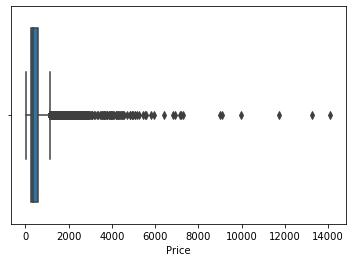

In [28]:
sns.boxplot(x=d_train['Price'])

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


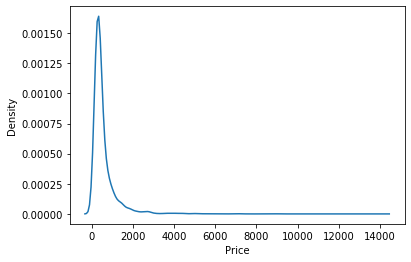

In [30]:
sns.kdeplot(x=d_train["Price"])

In [31]:
from scipy import stats
z = np.abs(stats.zscore(d_train["Price"]))
print(z)

0       0.493739
1       0.518477
2       0.379256
3       0.551706
4       0.586783
          ...   
6232    0.345925
6233    0.202458
6234    0.234340
6235    0.350273
6236    0.157534
Name: Price, Length: 6237, dtype: float64
